# Data Profiling

## Setup

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import ds_functions as ds

data1 = pd.read_csv('Datasets/heart_failure_clinical_records_dataset.csv', sep=',', decimal='.')
data2 = pd.read_csv('Datasets/qsar_oral_toxicity.csv', sep=';', decimal='.')

## Aux Functions

In [4]:
def cast_object_to_categorical(data):
    cat_vars = data.select_dtypes(include='object')
    data[cat_vars.columns] = data.select_dtypes(['object']).apply(lambda x: x.astype('category'))
    return data

## Data Dimensionality

### Heart Failure Dataset

* ratio between nr of records and nr variables is good enough?
* 

(299, 13)


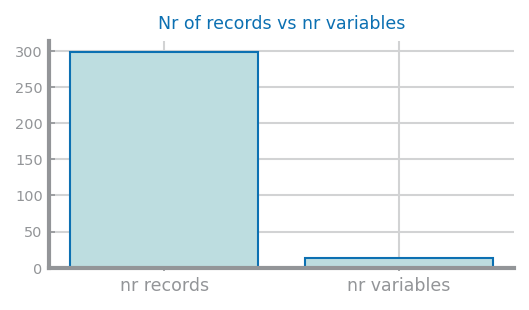

In [5]:
print(data1.shape)

plt.figure(figsize=(4,2))
values = {'nr records': data1.shape[0], 'nr variables': data1.shape[1]}
ds.bar_chart(values.keys(), values.values(), title='Nr of records vs nr variables')

#### Variables' Type

In [6]:
data1.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

#### Missing Values

* There are no missing values

### Oral Toxicity Dataset

* ratio between nr of records and nr variables is good enough?
* 

(8991, 1025)


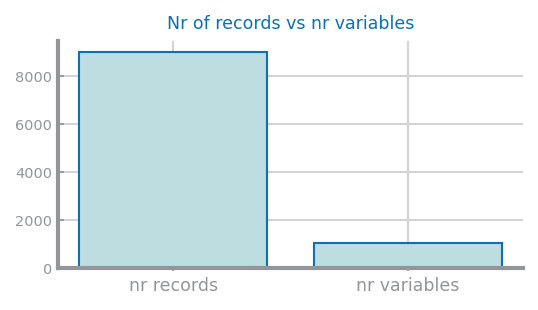

In [7]:
print(data2.shape)

plt.figure(figsize=(4,2))
values = {'nr records': data2.shape[0], 'nr variables': data2.shape[1]}
ds.bar_chart(values.keys(), values.values(), title='Nr of records vs nr variables')

#### Variables' Type

In [8]:
data2.dtypes

0            int64
0.1          int64
0.2          int64
0.3          int64
0.4          int64
             ...  
0.967        int64
0.968        int64
0.969        int64
0.970        int64
negative    object
Length: 1025, dtype: object

In [9]:
data2 = cast_object_to_categorical(data2)
data2.shape

(8991, 1025)

#### Missing Values

* There are no missing values

## Data Distribution 

## Data Granularity

### Heart Failure Dataset

{'nr records': 299, 'nr variables': 13}
7/13 variables plotted
Empty DataFrame
Columns: [age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time, DEATH_EVENT]
Index: []
False
Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time'],
      dtype='object')


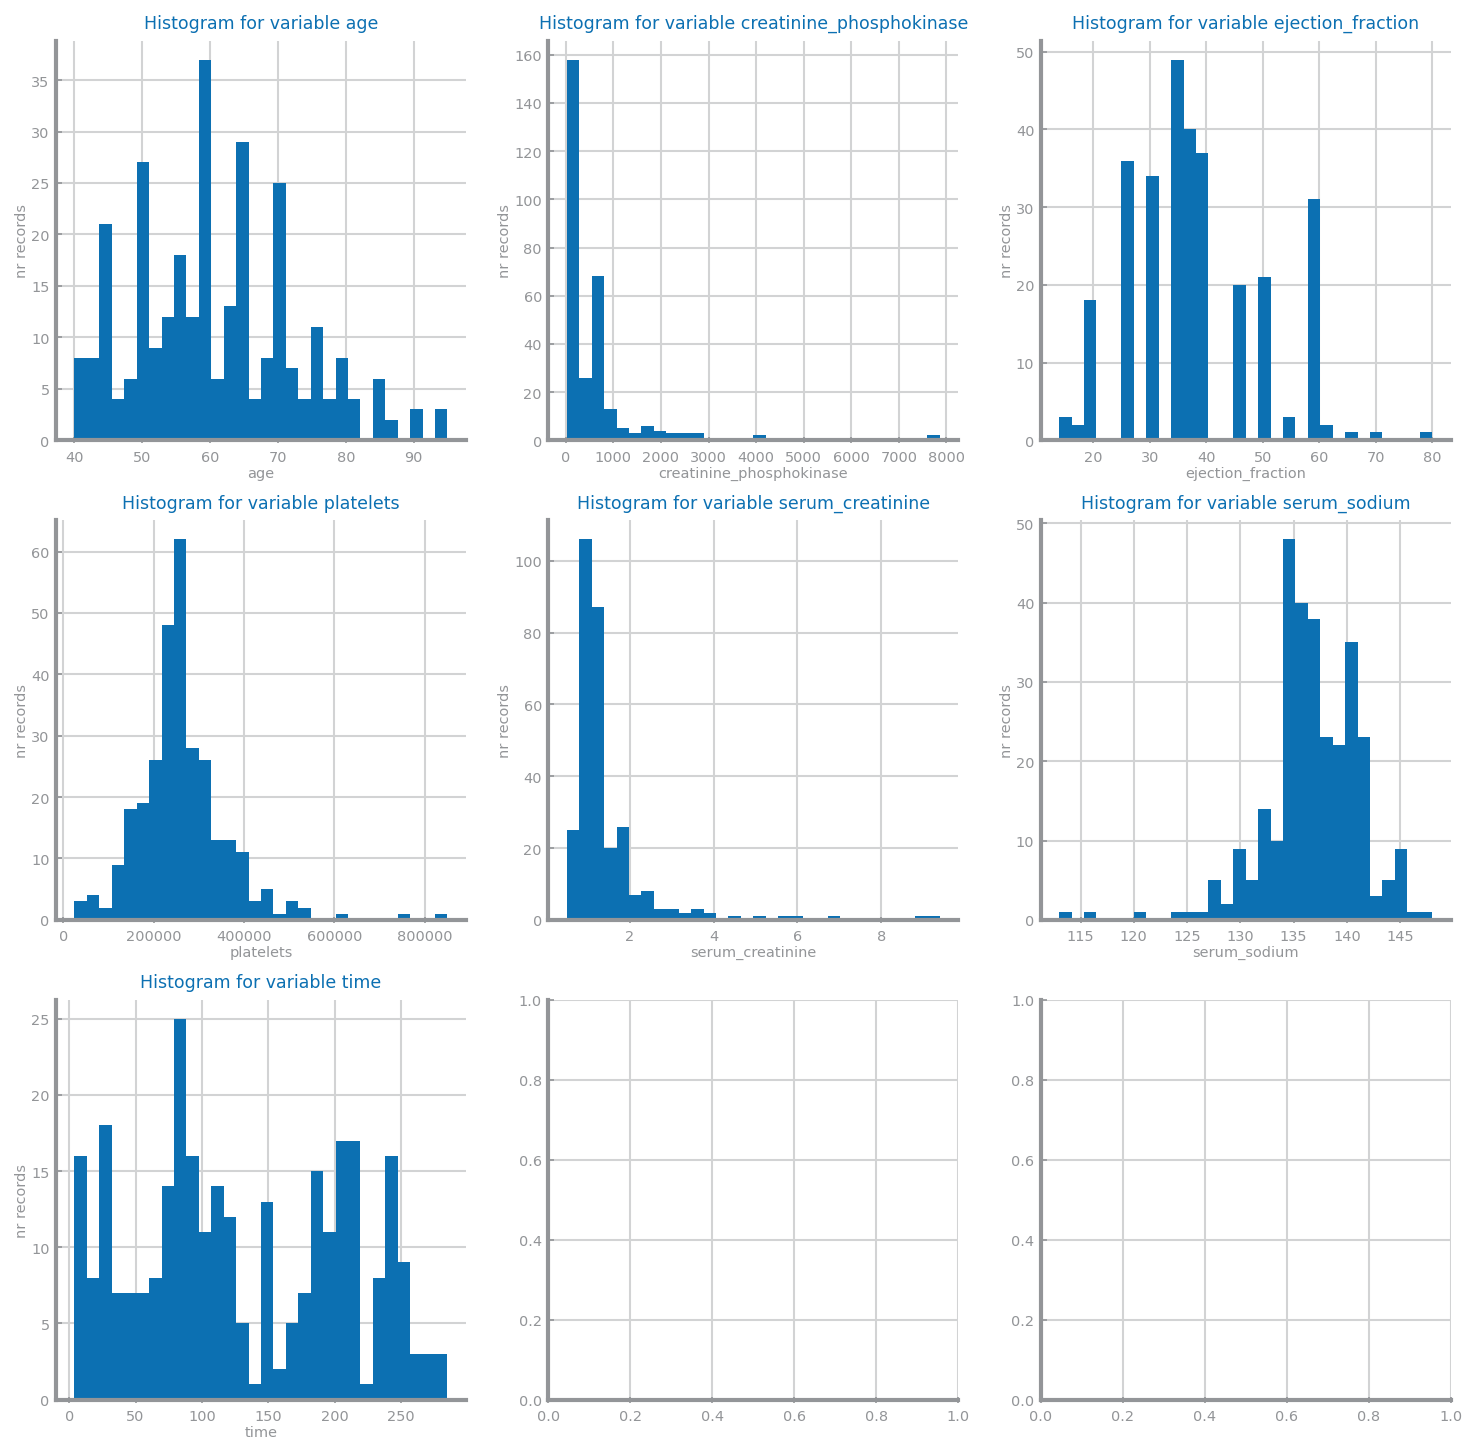

In [54]:
values = {'nr records': data1.shape[0], 'nr variables': data1.shape[1]}
print(values)

variables = data1.select_dtypes(include='number').columns
variables = variables.drop(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT'])
print(str(len(variables)) + "/" + str(values['nr variables']) + " variables plotted")
print(data1.loc[data1.index.map(lambda x: x in ['age'])])
l = lambda x: x in ['age']
print(l("any"))
print(variables)

rows, cols = ds.choose_grid(len(variables))
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0

for n in range(len(variables)):
    axs[i, j].set_title('Histogram for variable {}'.format(variables[n]))
    axs[i, j].set_xlabel(variables[n])
    axs[i, j].set_ylabel('nr records')
    axs[i, j].hist(data1[variables[n]].values, bins=30)
    
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)

plt.show()

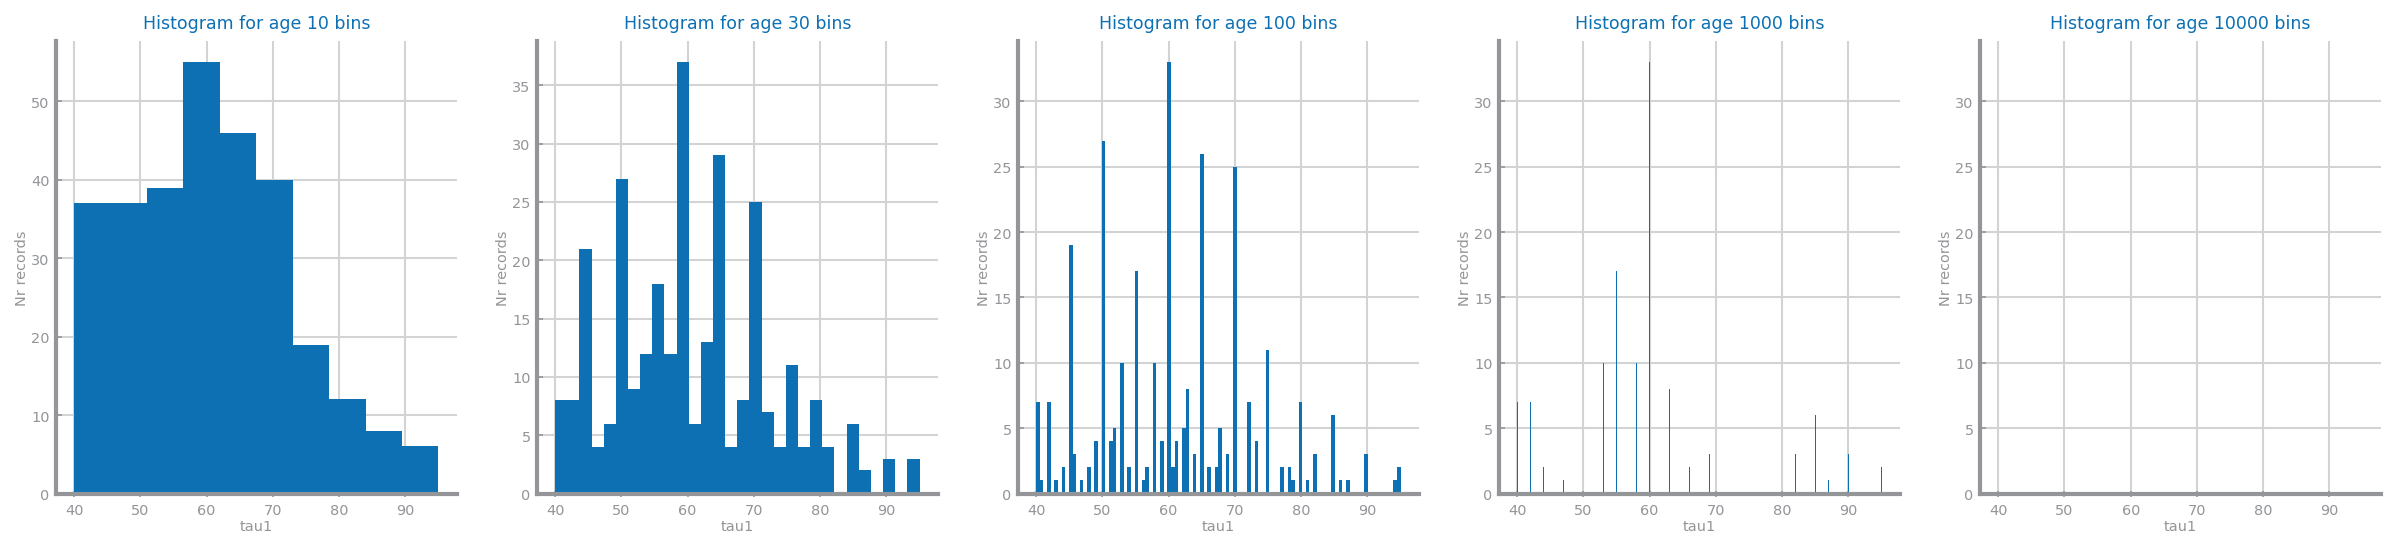

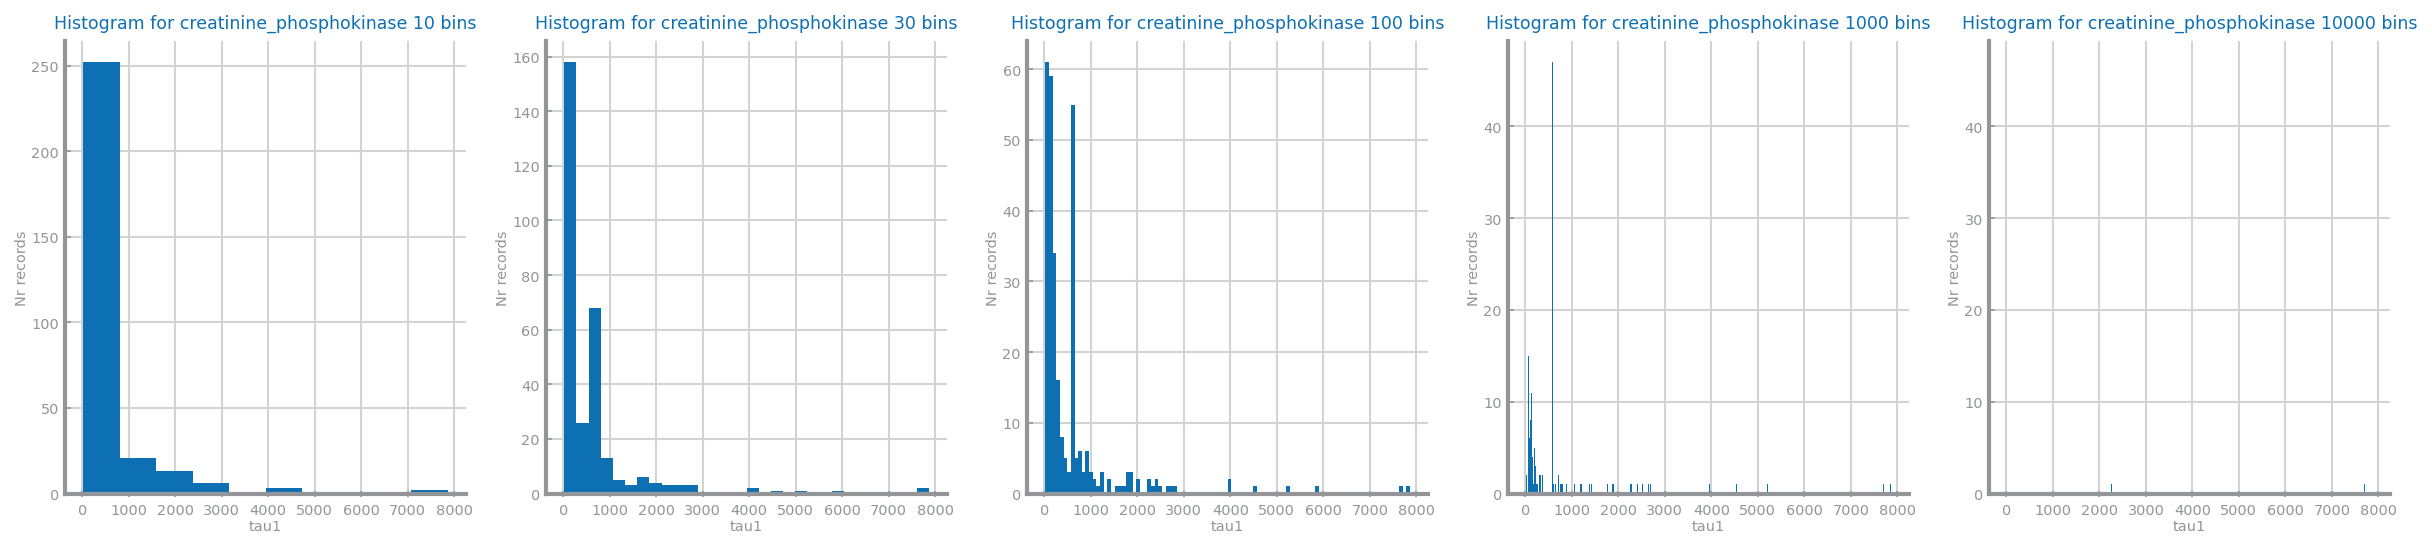

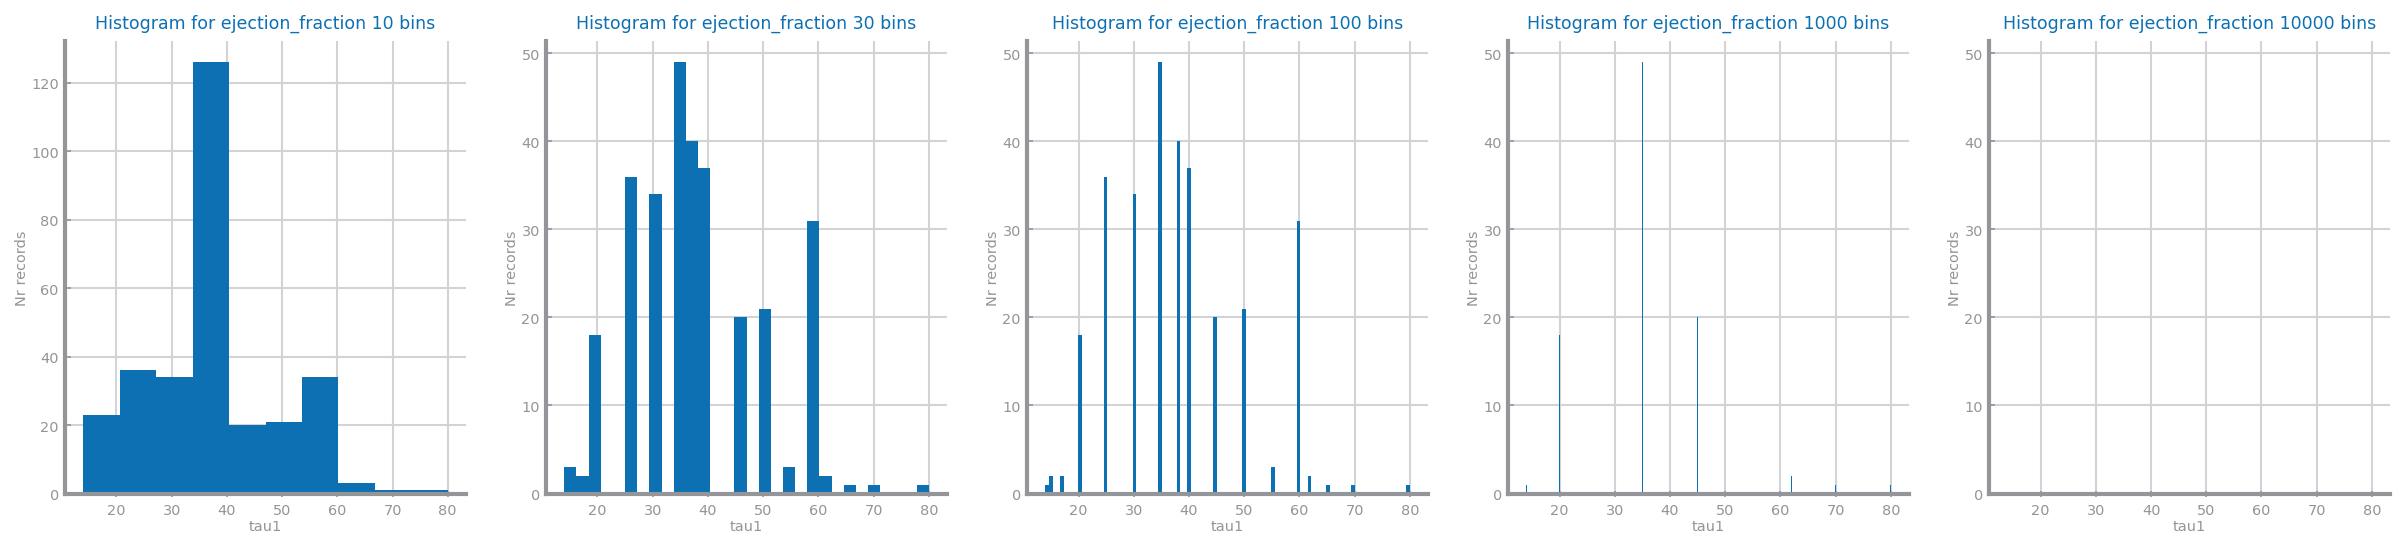

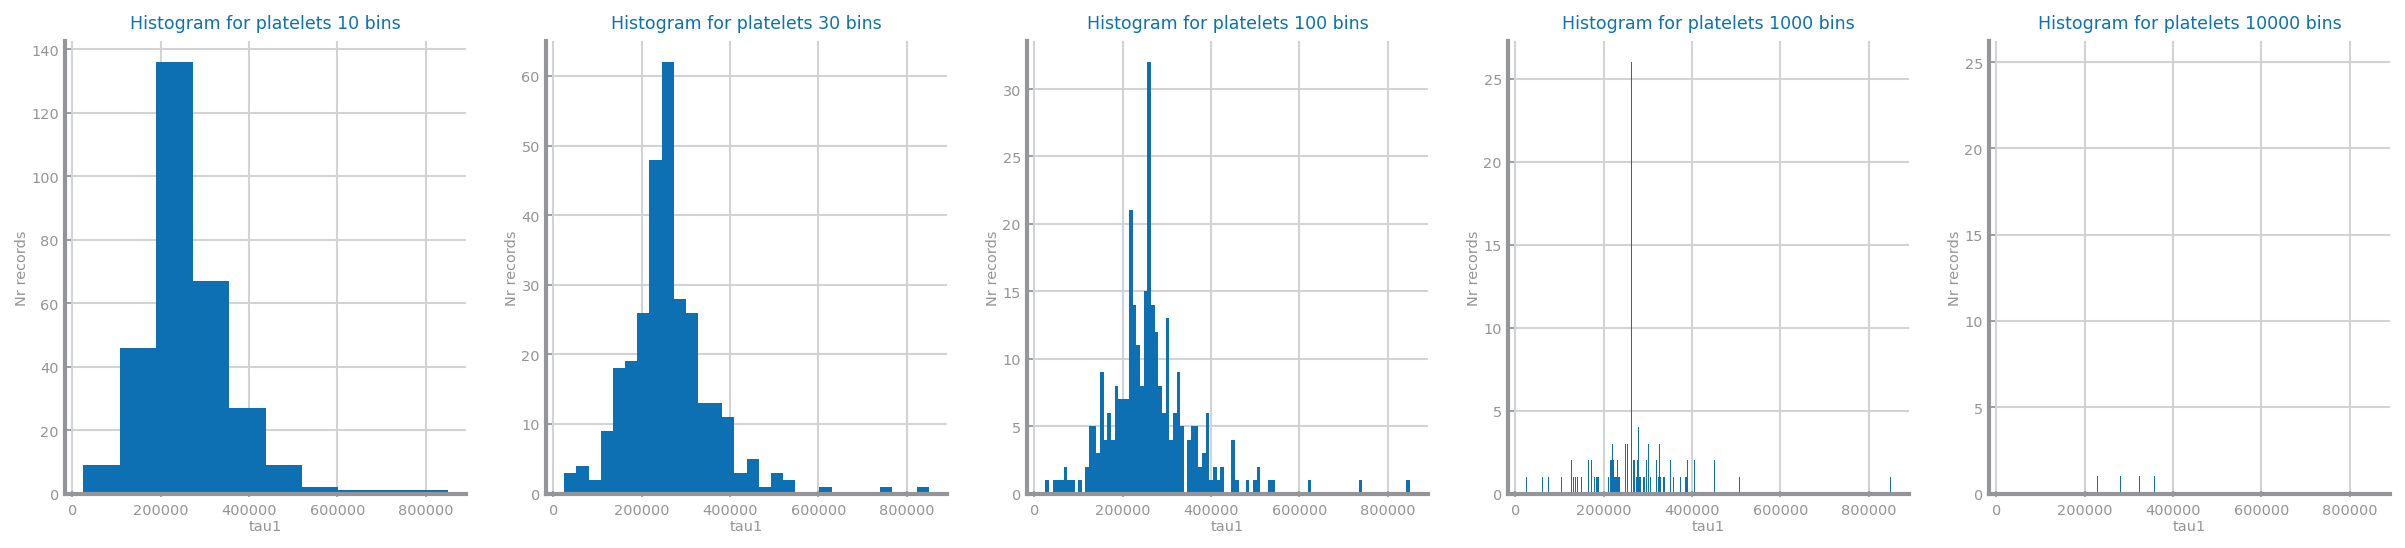

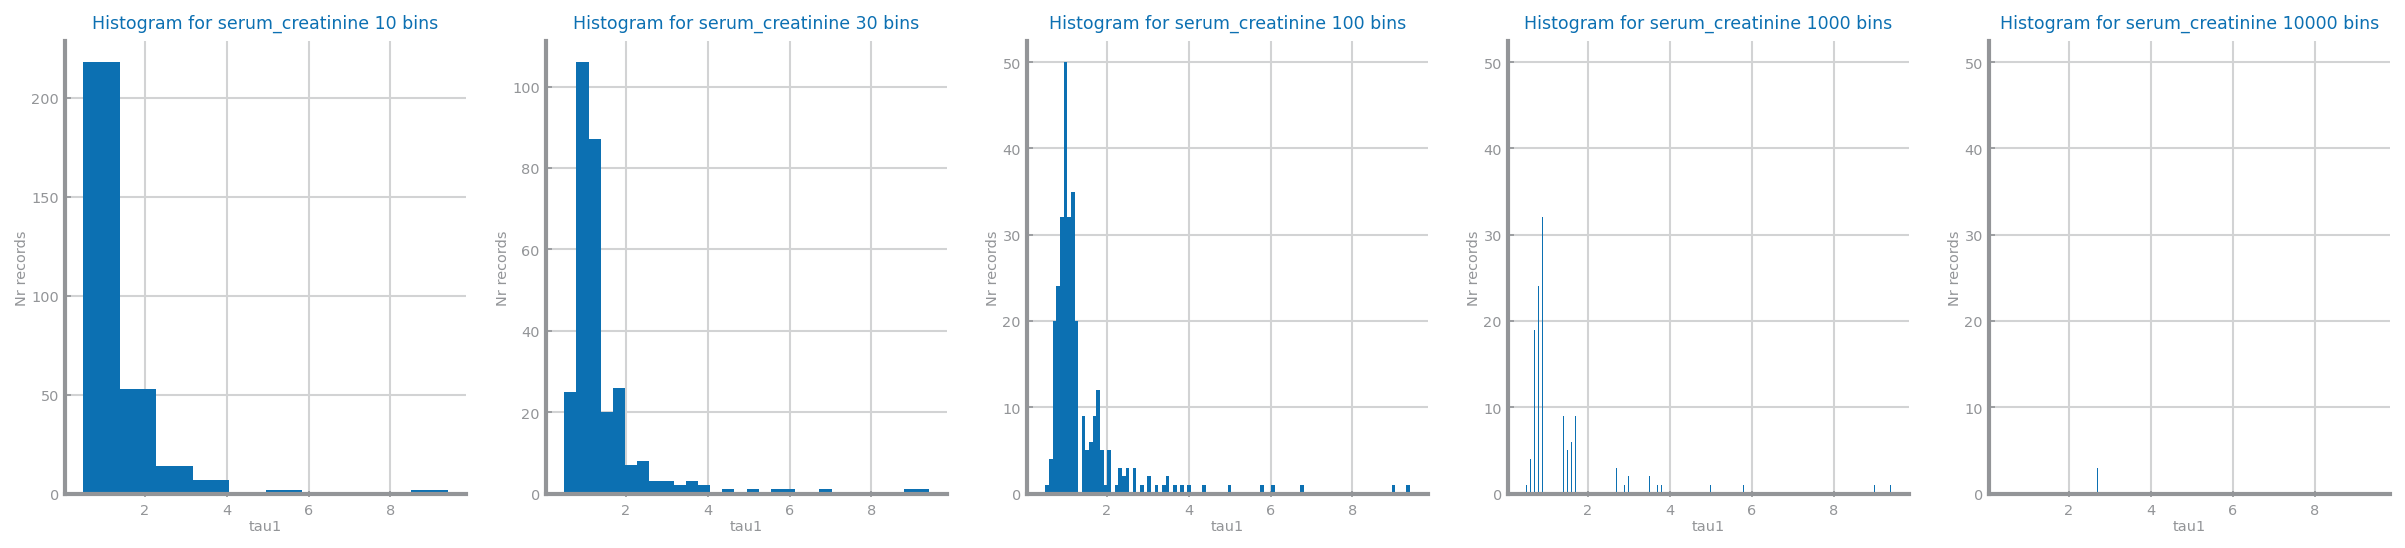

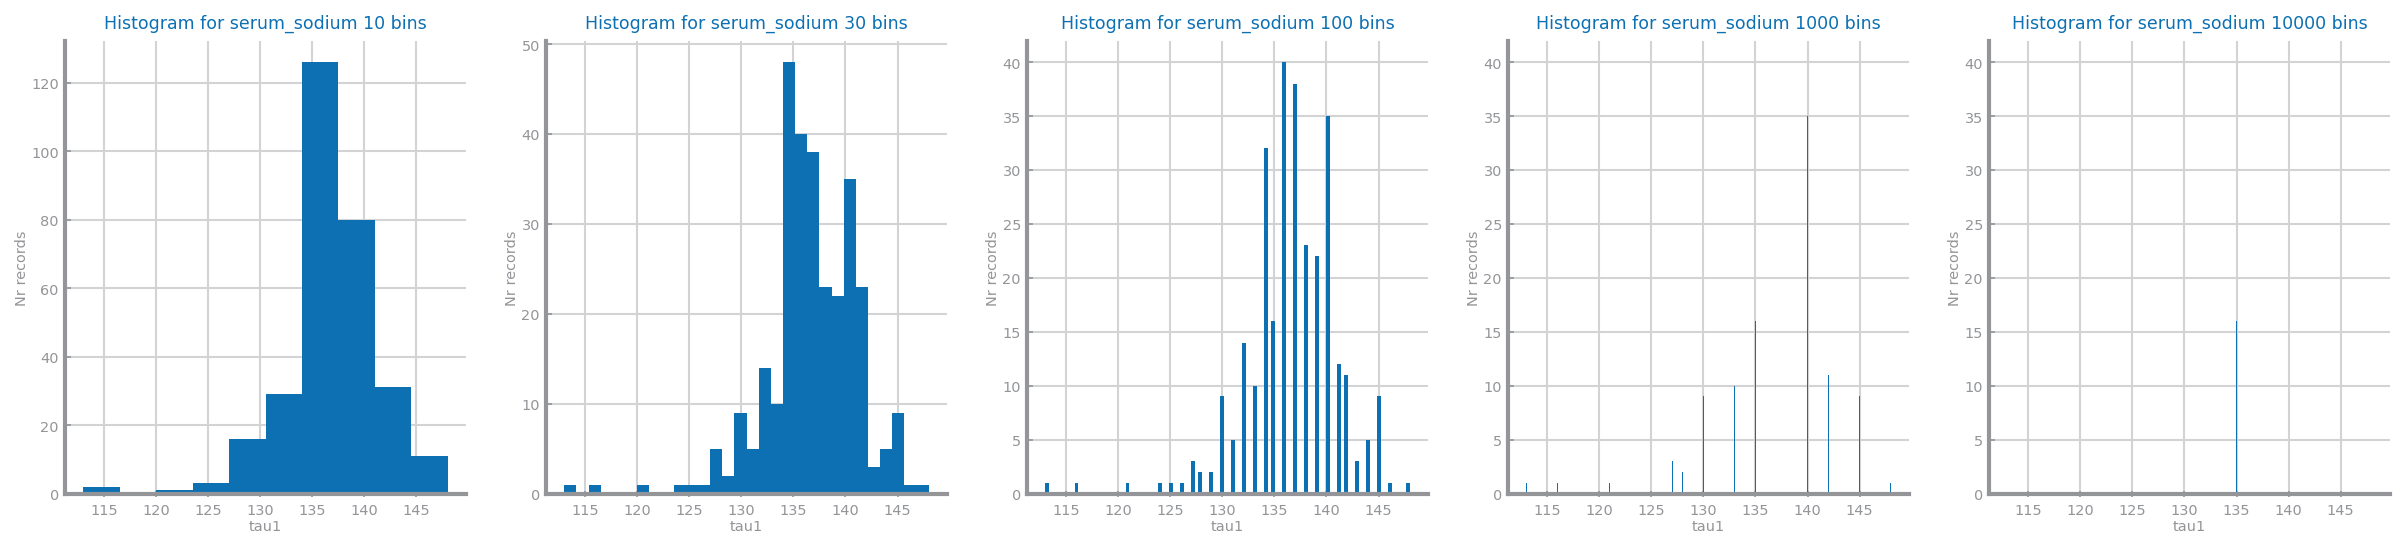

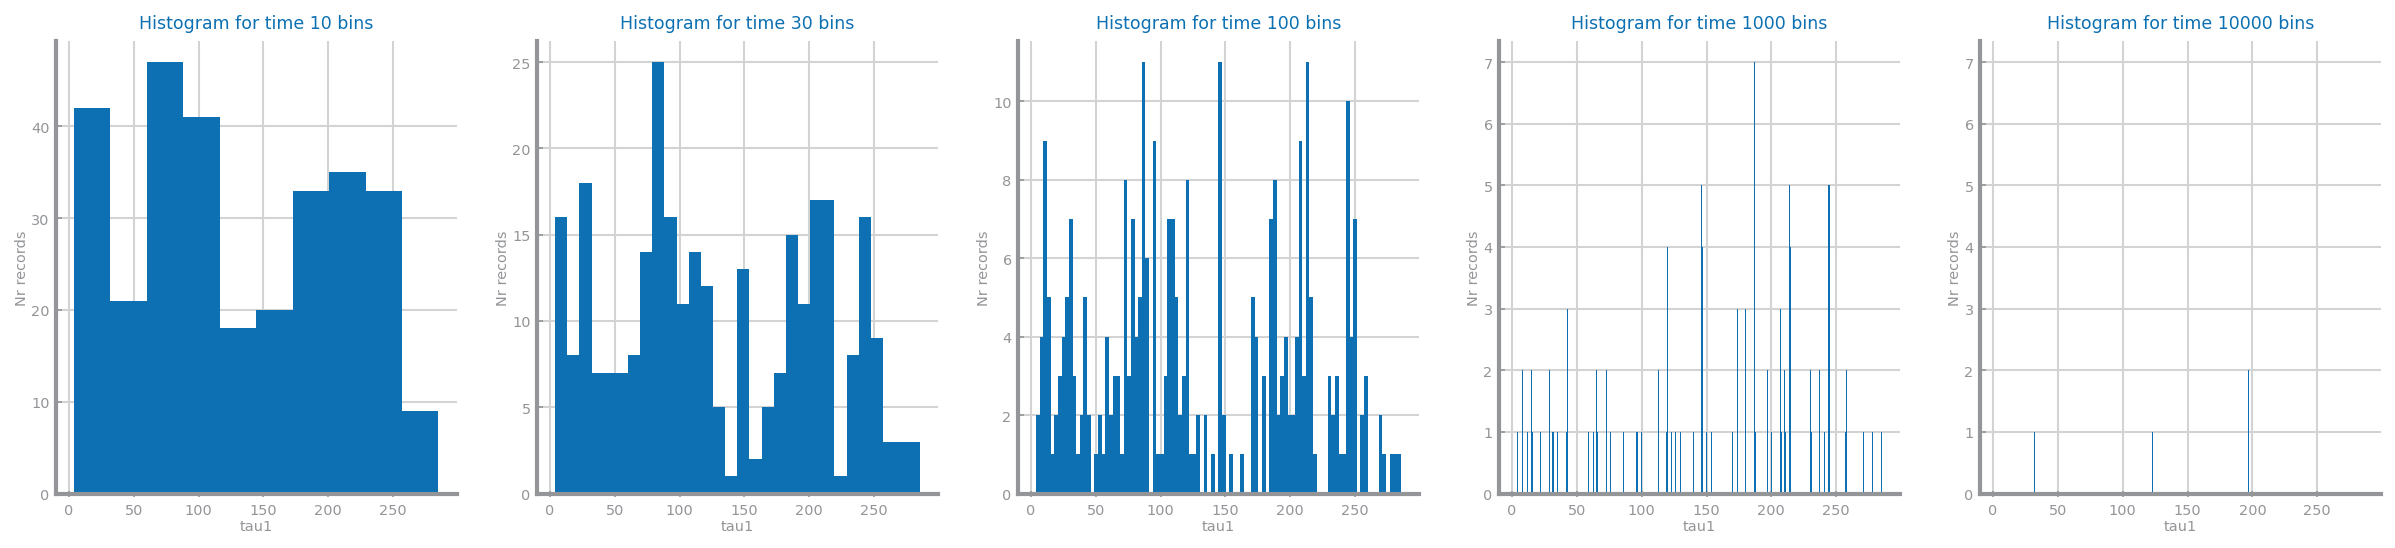

In [56]:

bins = (10, 30, 100, 1000, 10000)

for v in variables:
    fig, axs = plt.subplots(1, len(bins), figsize=(len(bins)*ds.HEIGHT, ds.HEIGHT))
    for j in range(len(bins)):
        axs[j].set_title('Histogram for %s %d bins'%(v, bins[j]))
        axs[j].set_xlabel('tau1')
        axs[j].set_ylabel('Nr records')
        axs[j].hist(data1[v].values, bins=bins[j])
plt.show()

## Data Sparsity 